In [1]:
!pip uninstall scikit-learn
!pip install scikit-learn==1.2.1

Found existing installation: scikit-learn 1.0.2
Uninstalling scikit-learn-1.0.2:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/scikit_learn-1.0.2.dist-info/*
    /usr/local/lib/python3.8/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.8/dist-packages/sklearn/*
Proceed (Y/n)? y
  Successfully uninstalled scikit-learn-1.0.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 22.3 MB/s eta 0:00:00


In [2]:
import sklearn
sklearn.__version__

'1.2.1'

In [3]:
from sklearn.datasets import fetch_openml

In [4]:
mnist_dataset = fetch_openml("mnist_784", as_frame=False)

/usr/local/lib/python3.8/dist-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [5]:
mnist_dataset.data.shape

(70000, 784)

In [6]:
mnist_dataset.target.shape

(70000,)

In [7]:
X, y = mnist_dataset.data, mnist_dataset.target

In [8]:
import matplotlib.pyplot as plt

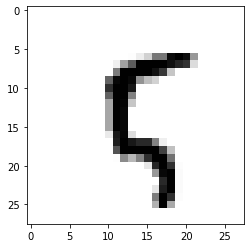

In [9]:
plt.imshow(X[100].reshape(28, 28), cmap="binary")

In [10]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [11]:
from sklearn.linear_model import SGDClassifier

In [12]:
y_train8 = (y_train == "8")
y_test8 = (y_test == "8")

In [13]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train8)

SGDClassifier()

In [14]:
y_train8

array([False, False, False, ..., False, False,  True])

In [15]:
sgd.predict(X_train[-3:])

array([False, False,  True])

In [16]:
sgd.score(X_train, y_train8)

0.9259833333333334

In [12]:
from sklearn.model_selection import cross_val_score

In [18]:
cross_val_score(sgd, X_train, y_train8, cv=5, scoring="accuracy")

array([0.92575   , 0.941     , 0.89116667, 0.93216667, 0.85833333])

In [13]:
from sklearn.dummy import DummyClassifier

In [20]:
dummy_c = DummyClassifier()
dummy_c.fit(X_train, y_train8)

DummyClassifier()

In [21]:
dummy_c.predict(X_train).sum()

0

In [22]:
cross_val_score(dummy_c, X_train, y_train8, cv=5, scoring="accuracy")

array([0.9025    , 0.9025    , 0.9025    , 0.9025    , 0.90241667])

In [14]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [24]:
skf = StratifiedKFold(n_splits=5)

In [25]:
for train_i, test_i in skf.split(X_train, y_train8):
  cloned_sgd = clone(sgd)
  X_train_f = X_train[train_i]
  y_train8_f = y_train8[train_i]
  X_test_f = X_train[test_i]
  y_test_f = y_train8[test_i]

  cloned_sgd.fit(X_train_f, y_train8_f)
  y_pred = cloned_sgd.predict(X_test_f)
  correct_predictions = (y_pred == y_test_f).sum()
  print(correct_predictions/len(y_pred))

0.936
0.9221666666666667
0.9336666666666666
0.9275833333333333
0.928


In [15]:
from sklearn.model_selection import cross_val_predict

In [27]:
y_pred = cross_val_predict(sgd, X_train, y_train8, cv=5)

In [16]:
from sklearn.metrics import confusion_matrix

In [29]:
confusion_matrix(y_train8, y_pred)

array([[51658,  2491],
       [ 2027,  3824]])

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [31]:
precision_score(y_train8, y_pred)

0.6055423594615994

In [32]:
recall_score(y_train8, y_pred)

0.6535634934199283

In [33]:
f1_score(y_train8, y_pred)

0.628637185599211

In [34]:
X_train[0].shape

(784,)

In [35]:
sgd.decision_function([X_train[0]])

array([-6899.48237537])

In [36]:
y_scores = cross_val_predict(sgd, X_train, y_train8, cv=5, method="decision_function")

In [18]:
from sklearn.metrics import precision_recall_curve

In [38]:
prec, recall, thresholds = precision_recall_curve(y_train8, y_scores)

In [39]:
thresholds.shape

(60000,)

In [40]:
recall.shape

(60001,)

In [19]:
import matplotlib.pyplot as plt

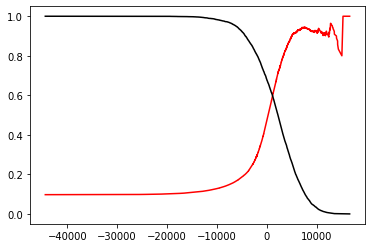

In [42]:
fig, ax = plt.subplots()
ax.plot(thresholds, prec[:-1], "r", label="Precision")
ax.plot(thresholds, recall[:-1], "black", label="Recall")

Text(0, 0.5, 'precision')

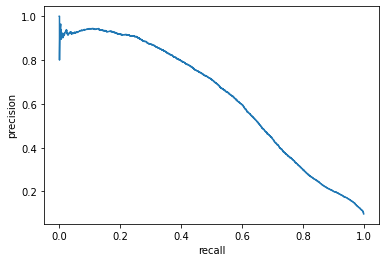

In [44]:
plt.plot(recall, prec)
plt.xlabel("recall")
plt.ylabel("precision")

In [50]:
thresh_for_80_prec = thresholds[(prec >= 0.8).argmax()]

In [51]:
y_pred_80_prec = (y_scores >= thresh_for_80_prec)

In [52]:
y_pred_80_prec

array([False, False, False, ..., False, False,  True])

In [53]:
precision_score(y_train8, y_pred_80_prec)

0.8000688231245698

In [54]:
recall_score(y_train8, y_pred_80_prec)

0.3973679712869595

In [55]:
# ROC curve

In [20]:
from sklearn.metrics import roc_curve

In [57]:
fpr, tpr, thresholds = roc_curve(y_train8, y_scores)

Text(0, 0.5, 'TPR')

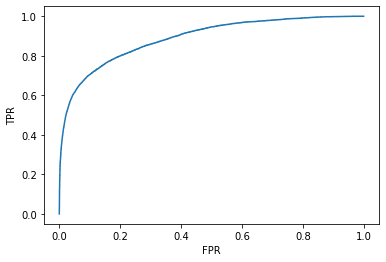

In [60]:
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")

In [21]:
from sklearn.metrics import roc_auc_score

In [62]:
roc_auc_score(y_train8, y_scores)

0.8883633841952372

# Multiclass classification

In [22]:
# OvR - OvA

In [23]:
# OvO -> n*(n-1)/2

In [24]:
from sklearn.svm import SVC

In [25]:
y_train

array(['5', '0', '4', ..., '5', '6', '8'], dtype=object)

In [26]:
svc = SVC()
svc.fit(X_train[:1000], y_train[:1000])

SVC()

In [29]:
svc.predict([X_train[0]])

array(['5'], dtype=object)

In [30]:
svc.decision_function([X_train[0]])

array([[ 1.75828215,  2.74956232,  6.13809559,  8.2853702 , -0.28728967,
         9.30119996,  0.74228825,  3.79256174,  7.20847395,  4.85762716]])

In [31]:
svc.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [32]:
from sklearn.multiclass import OneVsRestClassifier

In [33]:
ovr_svm = OneVsRestClassifier(SVC())

In [34]:
ovr_svm.fit(X_train[:1000], y_train[:1000])

OneVsRestClassifier(estimator=SVC())

In [35]:
ovr_svm.predict([X_train[0]])

array(['5'], dtype='<U1')

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay

In [37]:
y_pred = cross_val_predict(svc, X_train[:1000], y_train[:1000], cv=3)

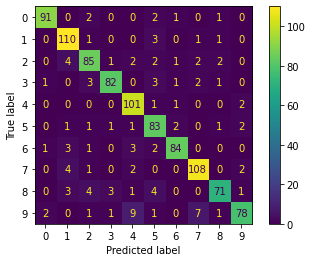

In [38]:
ConfusionMatrixDisplay.from_predictions(y_train[:1000], y_pred)

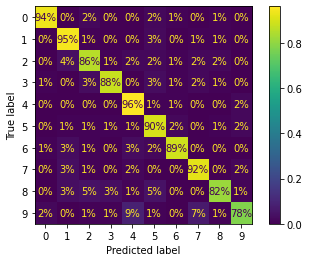

In [40]:
ConfusionMatrixDisplay.from_predictions(y_train[:1000],
                                        y_pred,
                                        normalize="true",
                                        values_format=".0%")

In [46]:
weights = (y_pred != y_train[:1000])

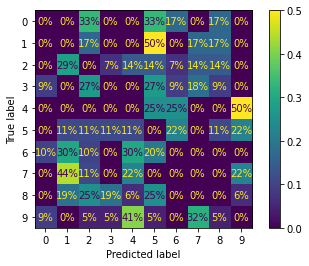

In [47]:
ConfusionMatrixDisplay.from_predictions(y_train[:1000],
                                        y_pred,
                                        sample_weight=weights,
                                        normalize="true",
                                        values_format=".0%")

# Multilabel classification

In [52]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [56]:
y_train_above5 = (y_train > '5')
y_train_even = (y_train.astype(np.int) % 2 == 0)

<ipython-input-56-99b06457aead>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_train_even = (y_train.astype(np.int) % 2 == 0)


In [58]:
y_train_ml = np.c_[y_train_above5, y_train_even]

In [59]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train_ml)

KNeighborsClassifier()

In [60]:
knn.predict([X_train[0]])

array([[False, False]])

In [65]:
y_pred = cross_val_predict(knn, X_train, y_train_ml, cv=3)

In [66]:
f1_score(y_train_ml, y_pred, average="macro")
# weighted

0.9781811708153897

In [67]:
from sklearn.multioutput import ClassifierChain

In [68]:
chain_svc = ClassifierChain(SVC(), cv=3)

In [69]:
chain_svc.fit(X_train[:2000], y_train_ml[:2000])

ClassifierChain(base_estimator=SVC(), cv=3)

In [70]:
chain_svc.predict([X_train[0]])

array([[0., 0.]])

# Multioutput classification

In [71]:
X_train.shape

(60000, 784)

In [74]:
np.random.seed(40)
image_noise = np.random.randint(0, 100, X_train.shape)
X_train_noisy = X_train + image_noise
image_noise = np.random.randint(0, 100, X_test.shape)
X_test_noisy = X_test + image_noise
y_train_mc = X_train
y_test_mc = X_test 

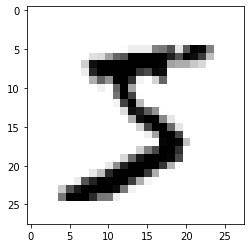

In [81]:
plt.imshow(X_train[0].reshape(28, 28), cmap="binary")

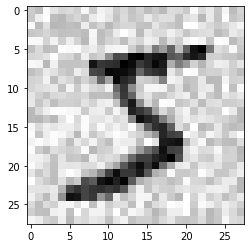

In [82]:
plt.imshow(X_train_noisy[0].reshape(28, 28), cmap="binary")

In [83]:
knn = KNeighborsClassifier()
knn.fit(X_train_noisy, y_train_mc)

KNeighborsClassifier()

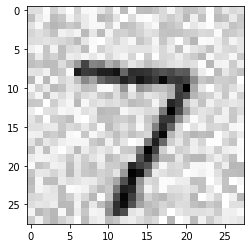

In [84]:
plt.imshow(X_test_noisy[0].reshape(28, 28), cmap="binary")

In [85]:
pred = knn.predict([X_test_noisy[0]])

In [86]:
pred.shape

(1, 784)

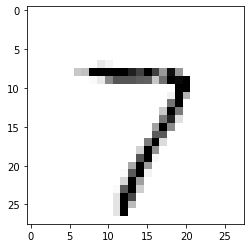

In [87]:
plt.imshow(pred.reshape(28, 28), cmap="binary")